In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris #调用数据
iris = load_iris() #导入sklearn自带的鸢尾花数据集
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


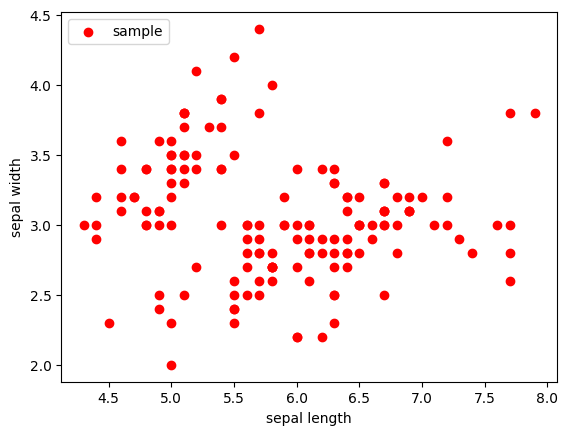

In [4]:
#取其中两个维度，绘制原始数据散点分布图
#x, y为散点坐标，c是散点颜色，marker是散点样式（如'o'为实心圆）
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], 
c = "red", marker='o', label='sample')
#横坐标轴标签
plt.xlabel('sepal length')
#纵坐标轴标签
plt.ylabel('sepal width')
#plt.legend设置图例的位置
plt.legend(loc=2)
plt.show()

D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

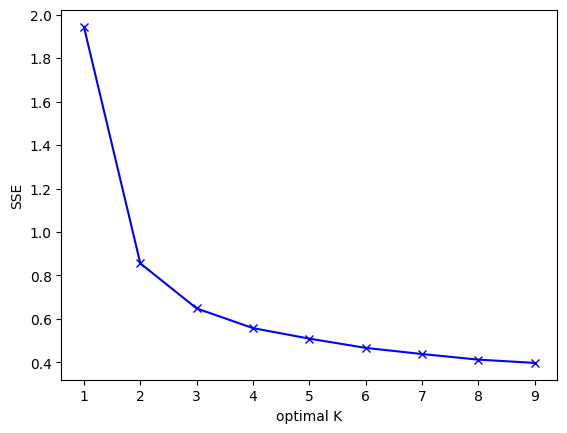

In [5]:
from scipy.spatial.distance import cdist
#先对图像样式做一些设计
plt.plot()
colors = ['b','g','r']  
markers = ['o','v','s']  
 #生成一个字典保存每次的代价函数
distortions = []
K = range(1,10)
for k in K:
    #分别构建各种K值下的聚类器
    Model = KMeans(n_clusters=k).fit(X) 
    #计算各个样本到其所在簇类中心欧式距离(保存到各簇类中心的距离的最小值)
    distortions.append(sum(np.min(cdist(X, Model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#绘制各个K值对应的簇内平方总和，即代价函数SSE
#可以看出当K=3时，出现了“肘部”，即最佳的K值。
plt.plot(K,distortions,'bx-')
#设置坐标名称
plt.xlabel('optimal K')
plt.ylabel('SSE')
plt.show()

In [6]:
model = KMeans(n_clusters=3) #构造聚类器
model.fit(X) #拟合我们的聚类模型

label_pred = model.labels_ #获取聚类标签
label_pred

D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\DevOps\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [7]:
ctr = model.cluster_centers_  #获取聚类中心
ctr

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [8]:
inertia = model.inertia_ #获取SSE
print("计算得到聚类平方误差总和为",inertia)

计算得到聚类平方误差总和为 78.85144142614602


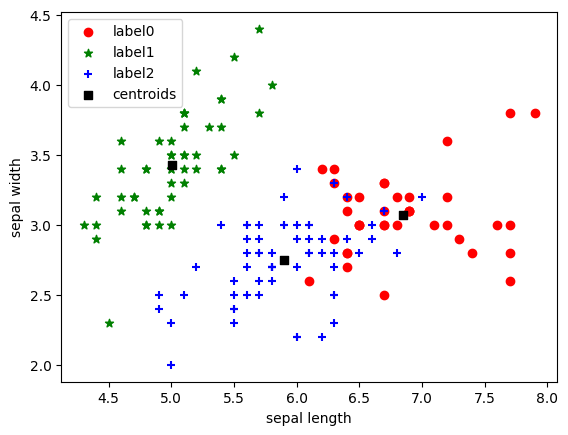

In [9]:
#绘制K-Means结果
#取出每个簇的样本
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
#分别绘出各个簇的样本
plt.scatter(x0["sepal length (cm)"], x0["sepal width (cm)"], 
            c = "red", marker='o', label='label0')
plt.scatter(x1["sepal length (cm)"], x1["sepal width (cm)"], 
            c = "green", marker='*', label='label1')
plt.scatter(x2["sepal length (cm)"], x2["sepal width (cm)"], 
            c = "blue", marker='+', label='label2')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            c = "black", marker='s',label='centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)